# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
import pandas as pd

df_titanic = pd.read_csv('./titanic.csv')
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [8]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_passenger = df_titanic[df_titanic['type'] == 'passenger']
pd.crosstab(df_passenger['class'], df_passenger['embarked'], normalize='all')

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [11]:
pd.crosstab(df_passenger['class'], df_passenger['embarked'], normalize='columns')

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [9]:
pd.crosstab(df_passenger['class'], df_passenger['embarked'], normalize='index')

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


Proportion of 3rd class passengers who embarked at Southampton: 0.54\
Proportion of Southampton passengers in 3rd class: 0.70

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [16]:
ct = pd.crosstab(df_passenger['class'], df_passenger['embarked'], normalize='columns')
ct.reset_index(inplace=True)
ct = ct.melt(id_vars=['class'], var_name=['embarked'], value_name='proportion')
ct

,class,embarked,proportion
0,1st,B,0.333333
1,2nd,B,0.666667
2,3rd,B,0.000000
3,1st,C,0.527675
4,2nd,C,0.095941
5,3rd,C,0.376384
6,1st,Q,0.024390
7,2nd,Q,0.056911
8,3rd,Q,0.918699
9,1st,S,0.191466


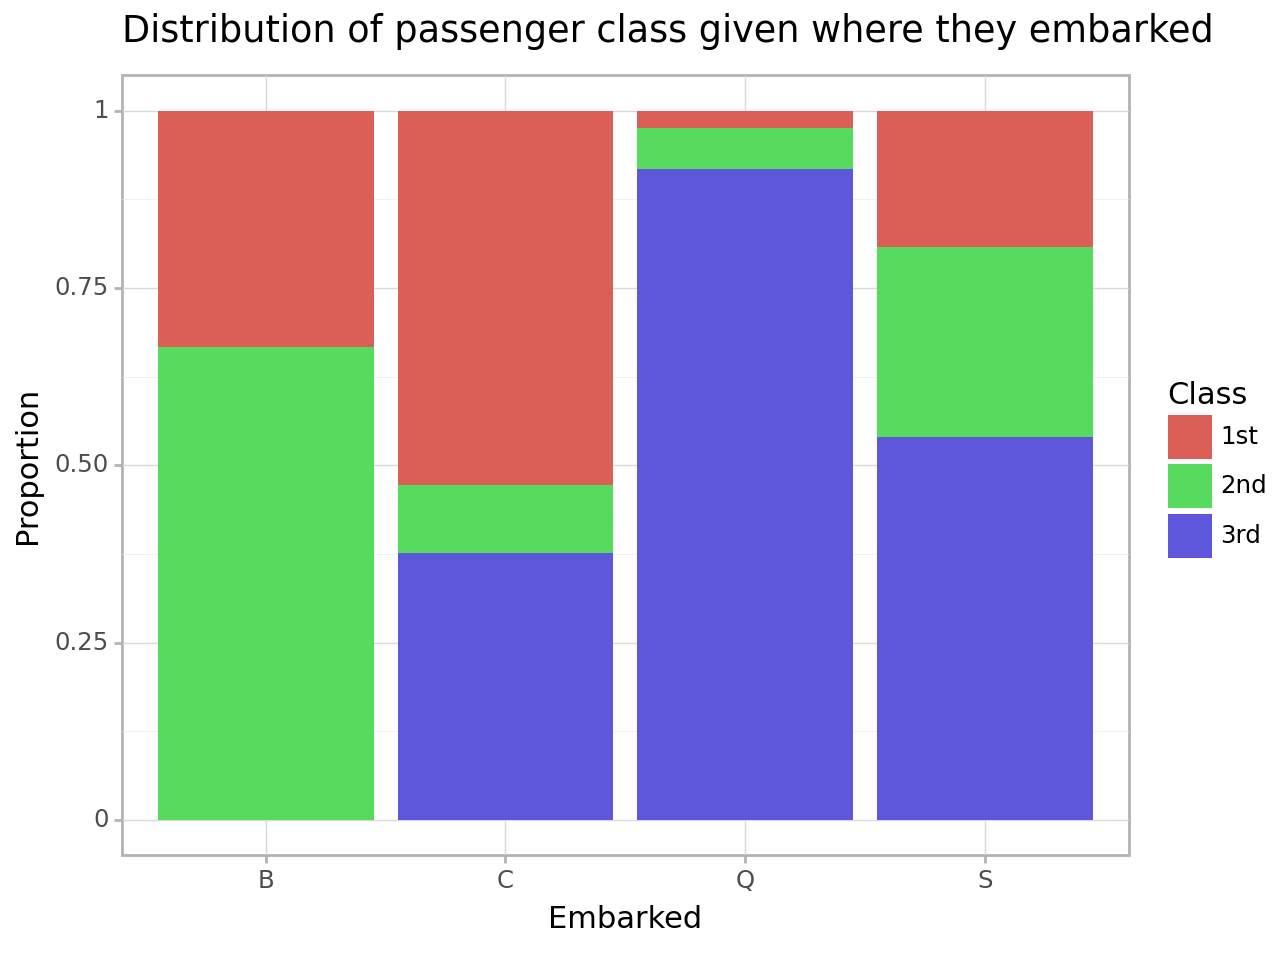

In [25]:
import plotnine as p9

plot = (p9.ggplot(data=ct,
                  mapping=p9.aes(x='embarked',
                                 y='proportion',
                                 fill='class'))
        + p9.geom_bar(stat='identity')
        + p9.labs(title='Distribution of passenger class given where they embarked',
                  x='Embarked',
                  y='Proportion',
                  fill='Class')
        + p9.theme_light())

plot.draw()

The visualization is easier to compare relative proportions, but doesn't give the exact number.